In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

#----------------------------------------------------------
pd.set_option('display.max_columns', None)  # Show all columns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv('cleaned_accidents.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                10000 non-null  float64
 8   End_Lng                10000 non-null  float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 10000 non-null  object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15  Zip

In [6]:
df['Start_Time']=pd.to_datetime(df['Start_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])

In [8]:
# Summary of the dataset

def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
ID,object,0,0,10000,nan,nan,nan,nan,A-7378431,1
Source,object,0,0,1,nan,nan,nan,nan,Source1,10000
Severity,int64,0,0,4,1.000000,4.000000,2.078200,0.390769,nan,nan
Start_Time,datetime64[ns],0,0,9972,2016-03-29 20:36:43,2023-03-31 18:22:00,2021-09-24 22:54:20.786200064,nan,nan,nan
End_Time,datetime64[ns],0,0,9990,2016-03-30 02:36:43,2023-03-31 20:42:43,2021-09-25 13:29:11.744299776,nan,nan,nan
Start_Lat,float64,0,0,9855,25.424922,48.993651,36.187580,5.332947,nan,nan
Start_Lng,float64,0,0,9861,-124.387963,-68.371838,-95.514844,18.114642,nan,nan
End_Lat,float64,0,0,9768,25.422156,48.995108,36.187684,5.333121,nan,nan
End_Lng,float64,0,0,9769,-124.391361,-68.371538,-95.514442,18.114157,nan,nan
Distance(mi),float64,0,0,2615,0.000000,65.009000,0.830385,1.689067,nan,nan


## D. Accidents at Junctions, Stops, and Traffic Signals
### 7.How many accidents occurred near: 
#### i. Junctions
#### ii. Stops
#### iii. Traffic Signals


In [47]:
# Count occurrences of True and False
junction_counts = df['Junction'].value_counts().reset_index()
stop_counts.columns = ['Junction', 'Count']  # Rename column

# Create bar plot
fig = px.bar(
    stop_counts,
    x='Junction',
    y='Count',
    text='Count',  # Display the total number on the bars
    color='Junction',  
    color_discrete_map={True: '#fc8d62', False: '#66c2a5'},  # Pastel colors
    title="Number of Accidents near Junctions"
)
fig


In [42]:
# Count occurrences of True and False
stop_counts = df['Stop'].value_counts().reset_index()
stop_counts.columns = ['Stop', 'Count']  # Rename column

# Create bar plot
fig = px.bar(
    stop_counts,
    x='Stop',
    y='Count',
    text='Count',  # Display the total number on the bars
    color='Stop',  
    color_discrete_map={True: '#fc8d62', False: '#66c2a5'},  # Pastel colors
    title="Number of Accidents near Stop Signals"
)
fig


In [46]:
# Count occurrences of True and False
traffic_signal_counts = df['Traffic_Signal'].value_counts().reset_index()
traffic_signal_counts.columns = ['Traffic_Signal', 'Count']  # Rename column

# Create bar plot
fig = px.bar(
    traffic_signal_counts,
    x='Traffic_Signal',
    y='Count',
    text='Count',  # Display the total number on the bars
    color='Traffic_Signal',  
    color_discrete_map={True: '#fc8d62', False: '#66c2a5'},  # Pastel colors
    title="Number of Accidents near Traffic Signals"
)
fig


### 8 .What percentage of total accidents do these categories represent?

<img src="https://theorytest.org.uk/wp-content/uploads/2019/03/unmarked-crossroads.jpg" alt="Parking Sign" width="400">


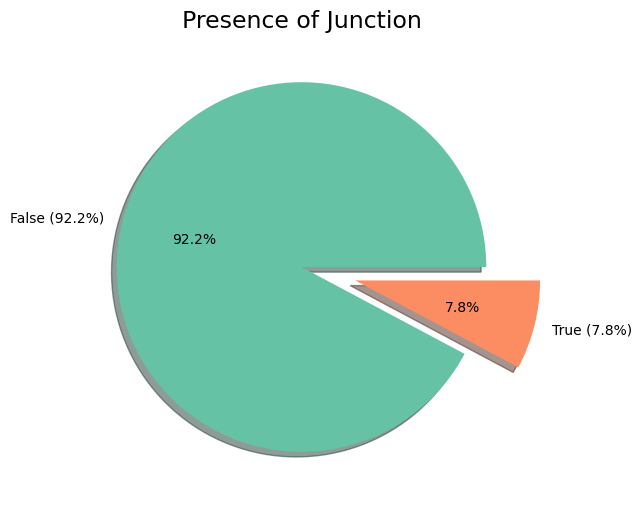

In [25]:
# Calculate percentages
value_counts = df['Junction'].value_counts(normalize=True)*100

# Labels for the pie chart
labels = [f'{label} ({value:.1f}%)' for label, value in zip(value_counts.index, value_counts.values)]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], shadow=True, explode=[0, 0.3])
plt.title('Presence of Junction', fontdict={'fontsize':17})
plt.show()

<img src="https://www.myparkingsign.com/img/lg2/K/k2-4958-2.png" alt="Parking Sign" width="300">


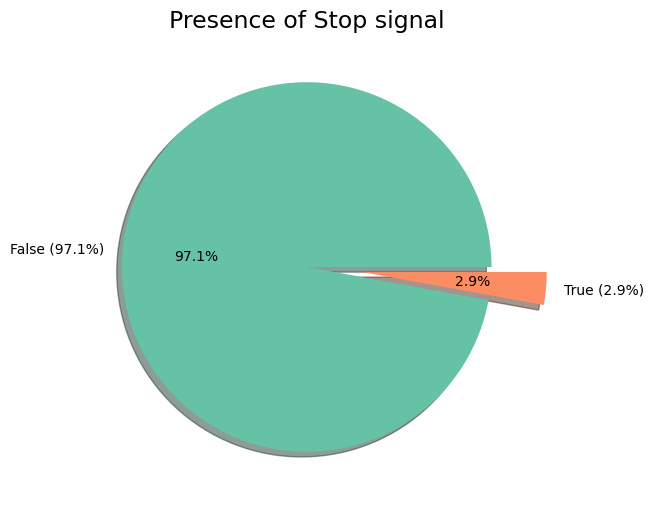

In [27]:
# Calculate percentages
value_counts = df['Stop'].value_counts(normalize=True)*100

# Labels for the pie chart
labels = [f'{label} ({value:.1f}%)' for label, value in zip(value_counts.index, value_counts.values)]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], shadow=True, explode=[0, 0.3])
plt.title('Presence of Stop signal', fontdict={'fontsize':17})
plt.show()

<img src="https://www.trafficsolution.cn/wp-content/uploads/2024/04/1669627503962169346.webp" alt="Parking Sign" width="400">


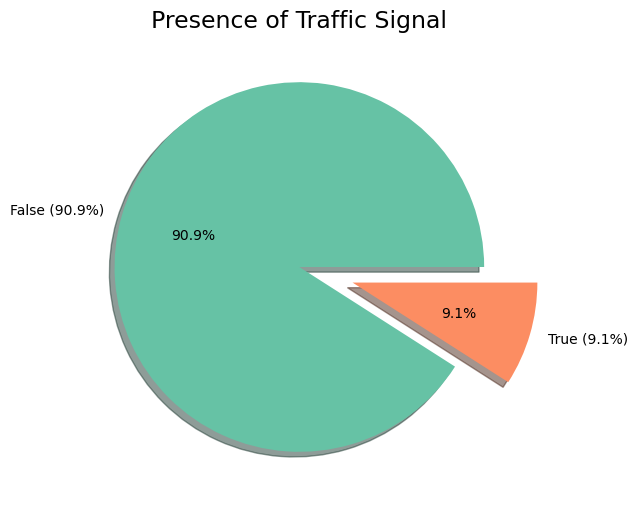

In [24]:
# Calculate percentages
value_counts = df['Traffic_Signal'].value_counts(normalize=True)*100

# Labels for the pie chart
labels = [f'{label} ({value:.1f}%)' for label, value in zip(value_counts.index, value_counts.values)]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], shadow=True, explode=[0, 0.3])
plt.title('Presence of Traffic Signal', fontdict={'fontsize':17})
plt.show()